# Assigment 1 

Exploratory Data Analysis on Haberman Dataset

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels import robust
import plotly.express as px

%matplotlib inline

## Reading the data File

In [31]:
df = pd.read_csv('haberman.csv')

In [32]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Extracting Basic Knowledge about the Data

In [33]:
# Shape of the data
print(df.shape)

(306, 4)


From this statement we know that there are 360 data points and four columns

In [34]:
# Printing Each Column in the Data , unique values and their counts
for col in df.columns:
    print(col)
    print(df[col].value_counts())

age
52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64
year
58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64
nodes
0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64
status
1    225
2     81
Name: status, dtype: int64

## Tweaking the status column

In [35]:
# A little tweak we have to as the code is also considering status as a 
# variable and plotting so , converting the status from 1 to survied and 
# deceased 
df['status'] = df['status'].apply(lambda x : 'Survived' if x == 1 else 'Deceased')
print(df)

     age  year  nodes    status
0     30    64      1  Survived
1     30    62      3  Survived
2     30    65      0  Survived
3     31    59      2  Survived
4     31    65      4  Survived
..   ...   ...    ...       ...
301   75    62      1  Survived
302   76    67      0  Survived
303   77    65      3  Survived
304   78    65      1  Deceased
305   83    58      2  Deceased

[306 rows x 4 columns]


## Univariate Analysis

### Age Vs Year Vs Nodes

#### Mean

In [36]:
print('Mean Age for Status as Survived = {}'.format(np.mean(df['age'][df['status']=='Survived'])))
print('Mean Age for Status as Deceased = {}'.format(np.mean(df['age'][df['status']=='Deceased'])))
print('Mean Year for Status as Survived = {}'.format(np.mean(df['year'][df['status']=='Survived'])))
print('Mean Year for Status as Deceased = {}'.format(np.mean(df['year'][df['status']=='Deceased'])))
print('Mean Nodes for Status as Survived = {}'.format(np.mean(df['nodes'][df['status']=='Survived'])))
print('Mean Nodes for Status as Deceased = {}'.format(np.mean(df['nodes'][df['status']=='Deceased'])))

Mean Age for Status as Survived = 52.01777777777778
Mean Age for Status as Deceased = 53.67901234567901
Mean Year for Status as Survived = 62.86222222222222
Mean Year for Status as Deceased = 62.82716049382716
Mean Nodes for Status as Survived = 2.7911111111111113
Mean Nodes for Status as Deceased = 7.45679012345679


#### Standard Deviation

In [37]:
print('Standard Deviation for Age for Status as Survived = {}'.format(np.std(df['age'][df['status']=='Survived'])))
print('Standard Deviation for Age for Status as Deceased = {}'.format(np.std(df['age'][df['status']=='Deceased'])))
print('Standard Deviation for Year for Status as Survived = {}'.format(np.std(df['year'][df['status']=='Survived'])))
print('Standard Deviation for Year for Status as Deceased = {}'.format(np.std(df['year'][df['status']=='Deceased'])))
print('Standard Deviation for Nodes for Status as Survived = {}'.format(np.std(df['nodes'][df['status']=='Survived'])))
print('Standard Deviation for Nodes for Status as Deceased = {}'.format(np.std(df['nodes'][df['status']=='Deceased'])))

Standard Deviation for Age for Status as Survived = 10.987655475100508
Standard Deviation for Age for Status as Deceased = 10.104182193031312
Standard Deviation for Year for Status as Survived = 3.2157452144021947
Standard Deviation for Year for Status as Deceased = 3.3214236255207887
Standard Deviation for Nodes for Status as Survived = 5.857258449412138
Standard Deviation for Nodes for Status as Deceased = 9.128776076761635


#### Variance

In [38]:
print('Variance for Age for Status as Survived = {}'.format(np.var(df['age'][df['status']=='Survived'])))
print('Variance for Age for Status as Deceased = {}'.format(np.var(df['age'][df['status']=='Deceased'])))
print('Variance for Year for Status as Survived = {}'.format(np.var(df['year'][df['status']=='Survived'])))
print('Variance for Year for Status as Deceased = {}'.format(np.var(df['year'][df['status']=='Deceased'])))
print('Variance for Nodes for Status as Survived = {}'.format(np.var(df['nodes'][df['status']=='Survived'])))
print('Variance for Nodes for Status as Deceased = {}'.format(np.var(df['nodes'][df['status']=='Deceased'])))

Variance for Age for Status as Survived = 120.72857283950617
Variance for Age for Status as Deceased = 102.09449778997104
Variance for Year for Status as Survived = 10.341017283950617
Variance for Year for Status as Deceased = 11.03185490016766
Variance for Nodes for Status as Survived = 34.30747654320988
Variance for Nodes for Status as Deceased = 83.33455265965554


#### Median

In [39]:
print('Median Age for Status as Survived = {}'.format(np.median(df['age'][df['status']=='Survived'])))
print('Median Age for Status as Deceased = {}'.format(np.median(df['age'][df['status']=='Deceased'])))
print('Median Year for Status as Survived = {}'.format(np.median(df['year'][df['status']=='Survived'])))
print('Median Year for Status as Deceased = {}'.format(np.median(df['year'][df['status']=='Deceased'])))
print('Median Nodes for Status as Survived = {}'.format(np.median(df['nodes'][df['status']=='Survived'])))
print('Median Nodes for Status as Deceased = {}'.format(np.median(df['nodes'][df['status']=='Deceased'])))

Median Age for Status as Survived = 52.0
Median Age for Status as Deceased = 53.0
Median Year for Status as Survived = 63.0
Median Year for Status as Deceased = 63.0
Median Nodes for Status as Survived = 0.0
Median Nodes for Status as Deceased = 4.0


#### Median Absolute Deviation

In [40]:
print('MAD for Age for Status as Survived = {}'.format(robust.mad(df['age'][df['status']=='Survived'])))
print('MAD for Age for Status as Deceased = {}'.format(robust.mad(df['age'][df['status']=='Deceased'])))
print('MAD for Year for Status as Survived = {}'.format(robust.mad(df['year'][df['status']=='Survived'])))
print('MAD for Year for Status as Deceased = {}'.format(robust.mad(df['year'][df['status']=='Deceased'])))
print('MAD for Nodes for Status as Survived = {}'.format(robust.mad(df['nodes'][df['status']=='Survived'])))
print('MAD for Nodes for Status as Deceased = {}'.format(robust.mad(df['nodes'][df['status']=='Deceased'])))

MAD for Age for Status as Survived = 13.343419966550417
MAD for Age for Status as Deceased = 11.860817748044816
MAD for Year for Status as Survived = 4.447806655516806
MAD for Year for Status as Deceased = 4.447806655516806
MAD for Nodes for Status as Survived = 0.0
MAD for Nodes for Status as Deceased = 5.930408874022408


#### Inter Quartile Range

In [43]:
print('IQR for Age for Status as Survived = {}'.format(np.percentile(df['age'][df['status']=='Survived'],75)-np.percentile(df['age'][df['status']=='Survived'],25)))
print('IQR for Age for Status as Deceased = {}'.format(np.percentile(df['age'][df['status']=='Survived'],75)-np.percentile(df['age'][df['status']=='Deceased'],25)))
print('IQR for Year for Status as Survived = {}'.format(np.percentile(df['year'][df['status']=='Survived'],75)-np.percentile(df['year'][df['status']=='Survived'],25)))
print('IQR for Year for Status as Deceased = {}'.format(np.percentile(df['year'][df['status']=='Deceased'],75)-np.percentile(df['year'][df['status']=='Deceased'],25)))
print('IQR for Nodes for Status as Survived = {}'.format(np.percentile(df['nodes'][df['status']=='Survived'],75)-np.percentile(df['nodes'][df['status']=='Survived'],25)))
print('IQR for Nodes for Status as Deceased = {}'.format(np.percentile(df['nodes'][df['status']=='Deceased'],75)-np.percentile(df['nodes'][df['status']=='Deceased'],25)))

IQR for Age for Status as Survived = 17.0
IQR for Age for Status as Deceased = 14.0
IQR for Year for Status as Survived = 6.0
IQR for Year for Status as Deceased = 6.0
IQR for Nodes for Status as Survived = 3.0
IQR for Nodes for Status as Deceased = 10.0


#### Histogram

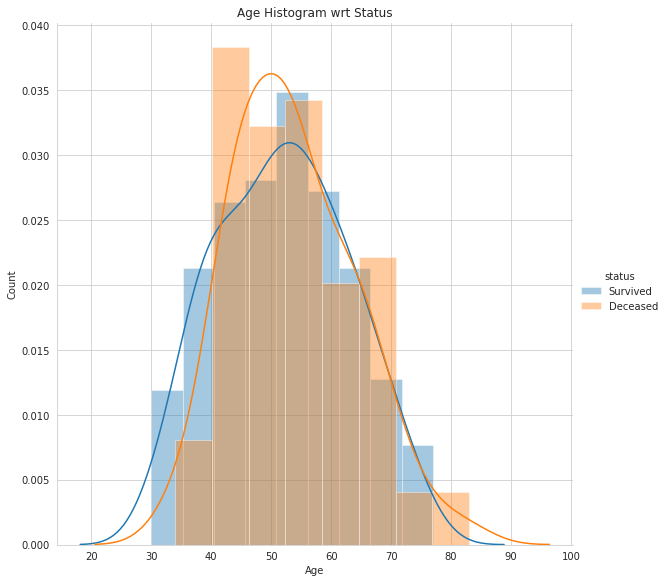

<Figure size 576x576 with 0 Axes>

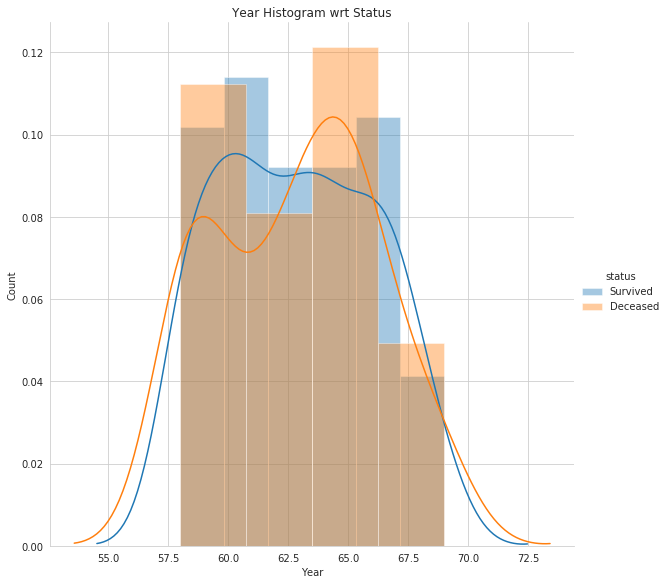

<Figure size 576x576 with 0 Axes>

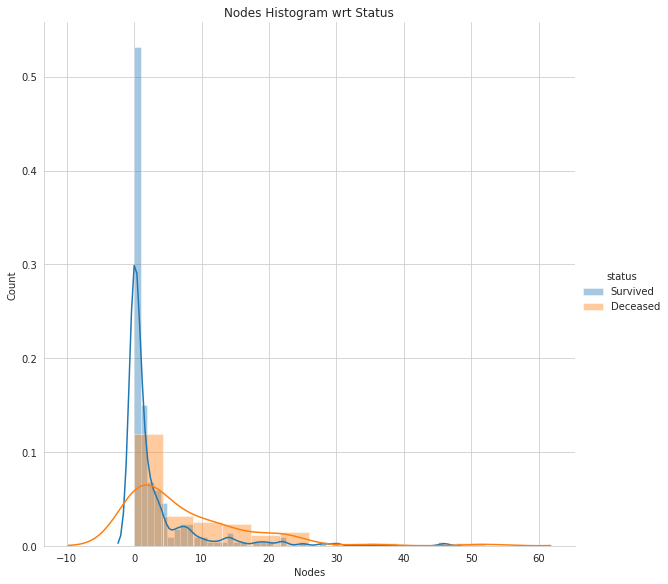

In [46]:
# plt.figure(figsize=(8,8))
sns.FacetGrid(df,hue='status',height=8).map(sns.distplot,'age').add_legend()
plt.title('Age Histogram wrt Status')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()
plt.figure(figsize=(8,8))
sns.FacetGrid(df,hue='status',height=8).map(sns.distplot,'year').add_legend()
plt.title('Year Histogram wrt Status')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()
plt.figure(figsize=(8,8))
sns.FacetGrid(df,hue='status',height=8).map(sns.distplot,'nodes').add_legend()
plt.title('Nodes Histogram wrt Status')
plt.ylabel('Count')
plt.xlabel('Nodes')
plt.show()

#### PDF Vs CDF

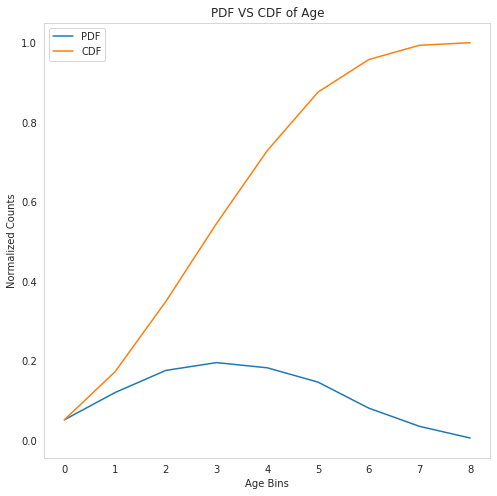

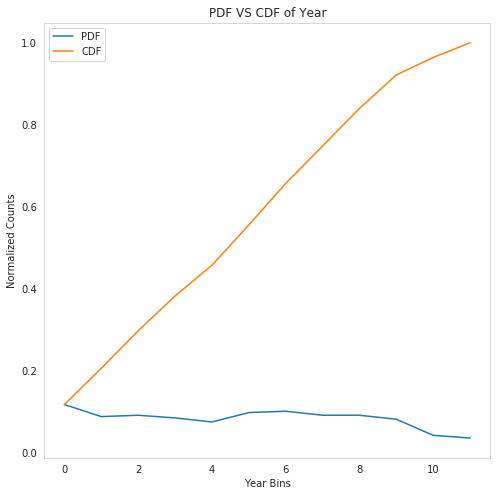

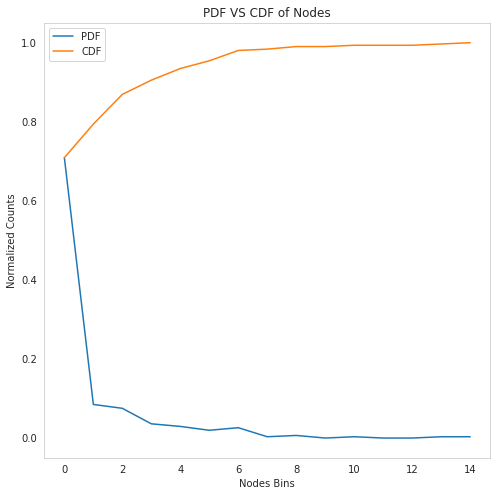

In [53]:
# Age
count , bins = np.histogram(df['age'],bins=9,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,8))
plt.plot(pdf,label='PDF')
plt.plot(cdf,label='CDF')
plt.grid()
plt.legend()
plt.xlabel('Age Bins')
plt.ylabel('Normalized Counts')
plt.title('PDF VS CDF of {}'.format('Age'))
plt.show()

# Year
count , bins = np.histogram(df['year'],bins=12,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,8))
plt.plot(pdf,label='PDF')
plt.plot(cdf,label='CDF')
plt.xlabel('Year Bins')
plt.ylabel('Normalized Counts')
plt.grid()
plt.legend()
plt.title('PDF VS CDF of {}'.format('Year'))
plt.show()

# Nodes
count , bins = np.histogram(df['nodes'],bins=15,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,8))
plt.plot(pdf,label='PDF')
plt.plot(cdf,label='CDF')
plt.xlabel('Nodes Bins')
plt.ylabel('Normalized Counts')
plt.grid()
plt.legend()
plt.title('PDF VS CDF of {}'.format('Nodes'))
plt.show()

#### Box-Plot

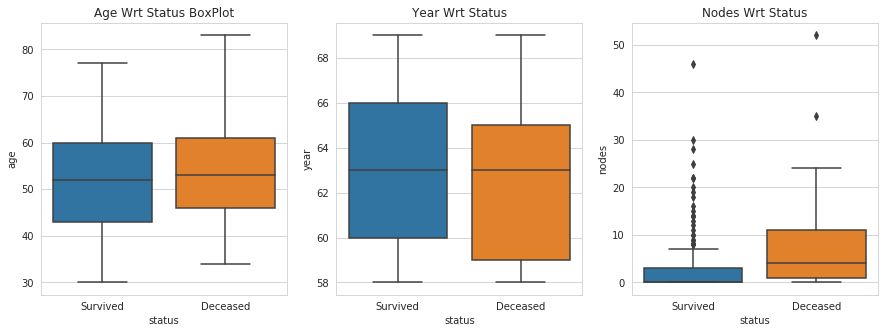

In [54]:
fig , ((ax1,ax2,ax3)) = plt.subplots(ncols=3,sharex=True,sharey=False
                                          ,figsize=(15,5))
# Age
sns.boxplot(y='age',x='status' , data=df,ax=ax1)
# Year
sns.boxplot(y='year',x='status' , data=df,ax=ax2)
# Nodes
sns.boxplot(y='nodes',x='status' , data=df,ax=ax3)

ax1.title.set_text('Age Wrt Status BoxPlot')
ax2.title.set_text('Year Wrt Status')
ax3.title.set_text('Nodes Wrt Status')

#### Violin Plot

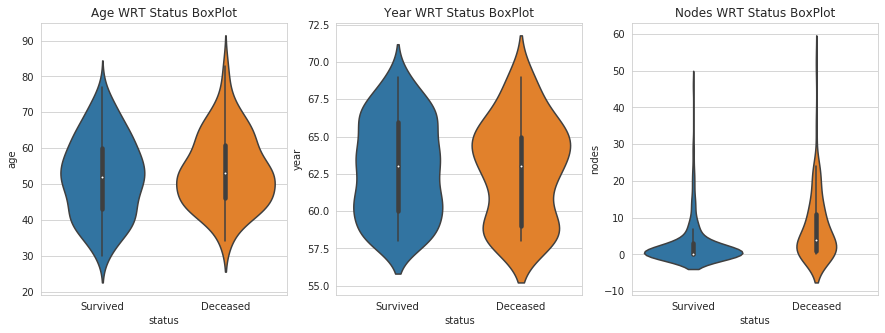

In [55]:
fig , ax = plt.subplots(ncols=3,sharex=True,sharey=False,figsize=(15,5))
sns.violinplot(y='age',x='status',data=df,ax=ax[0] )
sns.violinplot(y='year',x='status',data=df,ax=ax[1] )
sns.violinplot(y='nodes',x='status',data=df,ax=ax[2] )

ax[0].title.set_text('Age WRT Status BoxPlot')
ax[1].title.set_text('Year WRT Status BoxPlot')
ax[2].title.set_text('Nodes WRT Status BoxPlot')

## Bivariate Analysis 

### Age Vs Year Vs Node

#### Pair Plots

<Figure size 432x288 with 0 Axes>

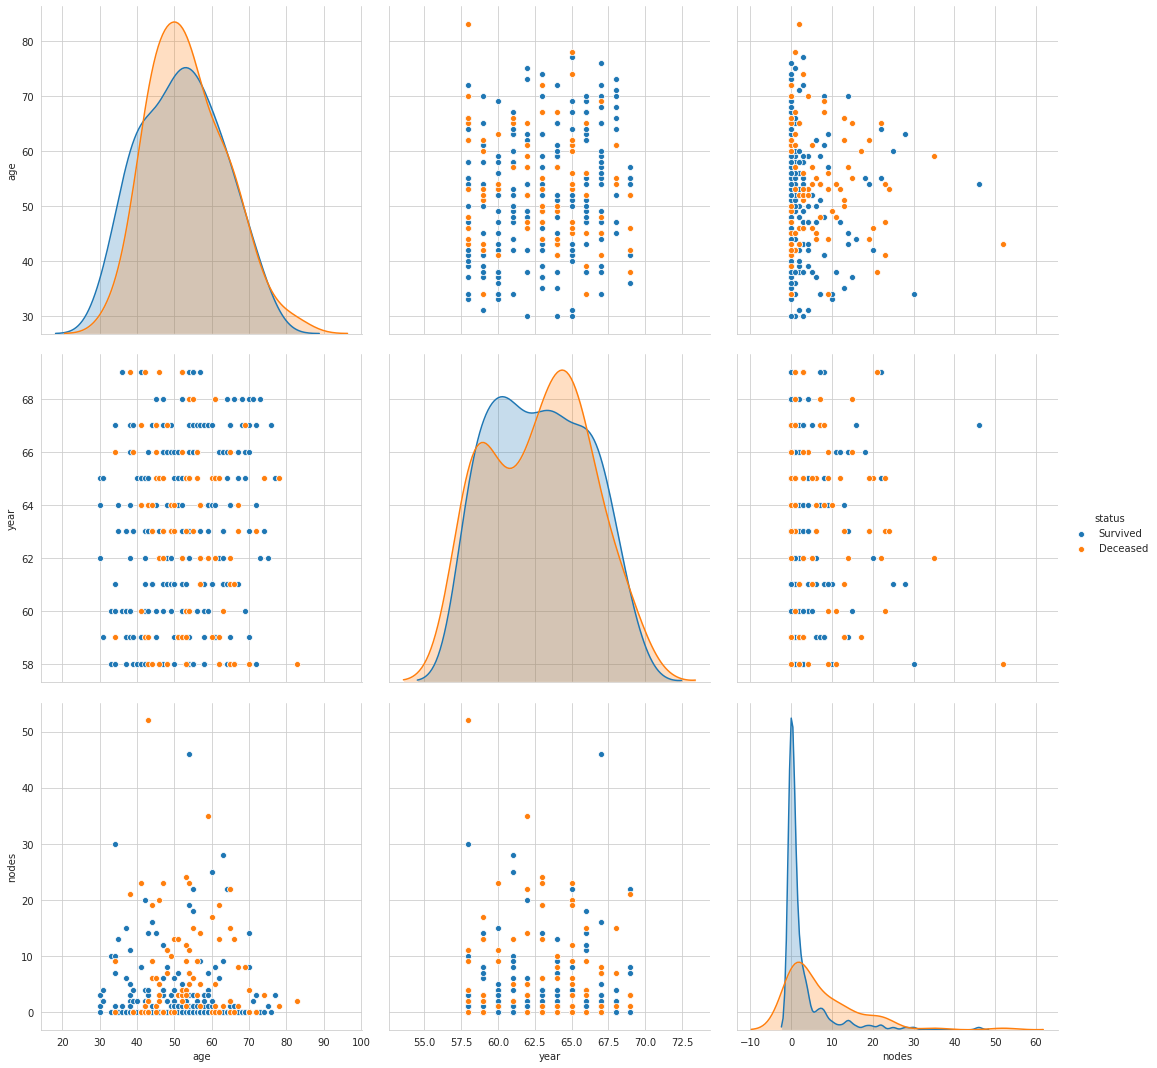

In [57]:
plt.figure()
sns.set_style("whitegrid")
sns.pairplot(df,hue="status",height=5)

## Multivariate Analysis

### Age Vs Year Vs Node

#### 3D Scatter Plot

In [58]:
px.scatter_3d(df,x='age',y='year',z='nodes',color='status')

## Observations


### Univariate Observations

1) There are 306 data points.

2) There are four columns named age , year , nodes , and status

3) Age : Age of the patients
   Year : Year of Operation
   Nodes: Number of Positive Lymph Nodes
   Status : Survival of the patient in next five years

4) Age , Year , Nodes are all continous variables where as Status is a categorical variable

5) Also this dataset is an unbalaced dataset


**Note** 
:
**From Kaggle it was described that value 1 in the status columns is 'patients survived more than 5 years' value 2 is 
'patient survived less than 5 years'**

[Kaggle Link](https://www.kaggle.com/gowtamsingulur/habermancsv)


1) Age: There is not much difference in the Mean and Median of the data for both the status also Age for both the status is not linearly seperable which is clear in the histogram also , also more than 50% percent of the patients lie between 40 and 60 age group for both the status. IQR here for Survived patients is 17 and for Deceased pateints is 14

2) Year: The Mean and Median values do not have much difference for both the status and year is also not linearly seperable for both the status , for Survived patients the 50% patients at the time of operation lie in 60 to 66 and for Deceased pateints 59 to 65 .IQR for Survived patient is 6 and for Deceased pateints is 6.

3) Nodes: Mean for Survived patientss is 2.78 and Median is 0 thus it implies that here Mean is not the correct measure of central tendency similarly for Deceased pateints also . For Survived patients 50 % of the values lie in 0 to  3-4  but this data is having a lots of outliers also and for Deceased pateints 50 % values lie between 1 to 11 . IQR for Survived patients is 3 and Deceased patients is 10.

### Bivariate Observations

1) Age , Year and Nodes cannot be seperated linearly as show in the pair plot

### Multivariate Observations

1) Sperating the Survived patients from the Deceased patients here cannot be done by simply drawing a plane 